In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Explore Data

In [4]:
df = pd.read_csv('profiles.csv')

In [5]:
df.head()
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [6]:
df.shape

(59946, 31)

In [7]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

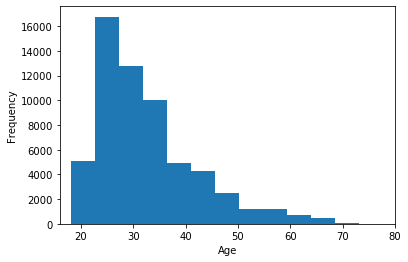

In [8]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [9]:
df.drinks.unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

Apply numeric mapping to drinks column

In [10]:
df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [11]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}

df["drinks_code"] = df.drinks.map(drink_mapping)

Combine essay columns

In [12]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

In [13]:
df["essay_len"] = all_essays.apply(lambda x: len(x))

Apply smokes numeric mapping

In [14]:
df.smokes.unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [15]:
smoke_mapping = {'no': 0, 'when drinking':1, 'sometimes': 2, 'trying to quit': 3, 'yes':4}
df['smokes_code'] = df.smokes.map(smoke_mapping)

In [16]:
df.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [17]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

Apply body type numeric mapping

In [18]:
body_mapping = {'skinny':0, 'thin':1, 'fit':2, 'athletic': 3, 'jacked':4, 'average':5, 'curvy':6, 'full figured': 7, 'a little extra': 7, 'used up':8, 'overweight': 9, 'rather not say': 6}

In [19]:
df['body_code'] = df.body_type.map(body_mapping)

In [20]:
df.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [62]:
print("Total males: ", len(df[df.sex == "m"]))
print("Total females: ", len(df[df.sex == "f"]))

Total males:  35829
Total females:  24117


# Plots to Explore Data

Height

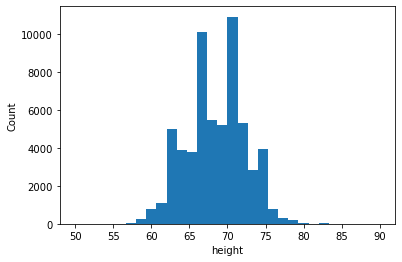

In [84]:
plt.hist(df.height, bins=30, range=(50, 90))
plt.xlabel("height")
plt.ylabel("Count")
plt.show()

counts

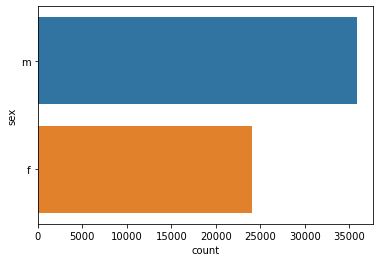

In [86]:
sns.countplot(data=df, y="sex");

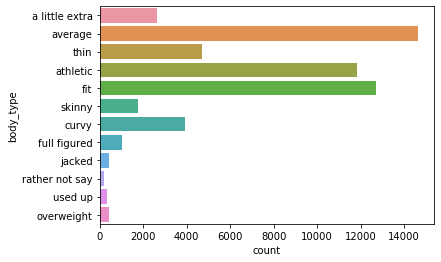

In [87]:
sns.countplot(data=df, y="body_type");

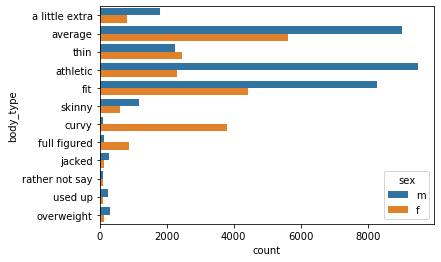

In [89]:
sns.countplot(data=df, y="body_type", hue = "sex");

Diet

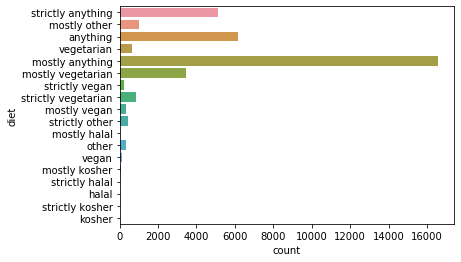

In [90]:
sns.countplot(data=df, y="diet");

Drinks

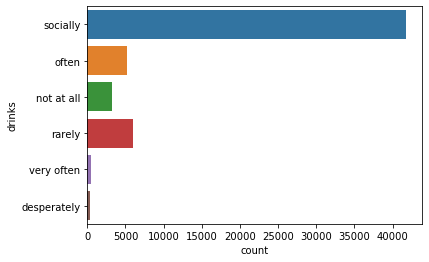

In [91]:
sns.countplot(data=df, y="drinks");

Drugs

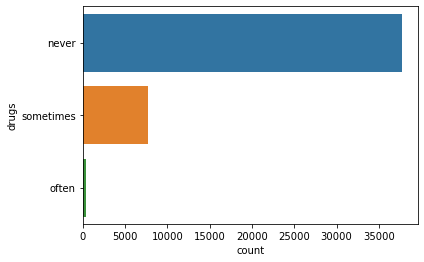

In [92]:
sns.countplot(data=df, y="drugs");

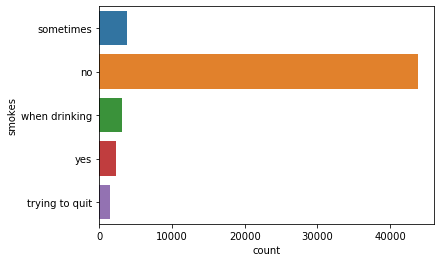

In [172]:
sns.countplot(data=df, y="smokes");

Education

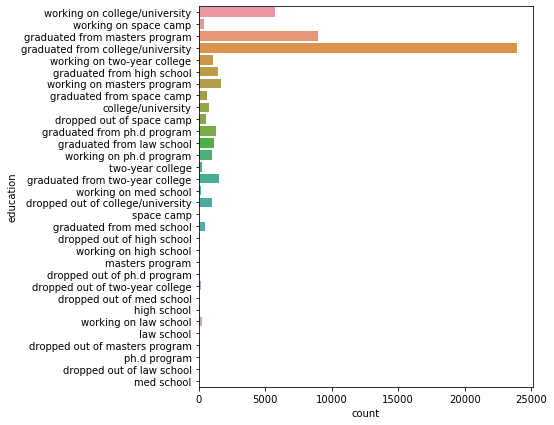

In [95]:
plt.figure(figsize=(6,7))

sns.countplot(data=df, y="education");

Jobs

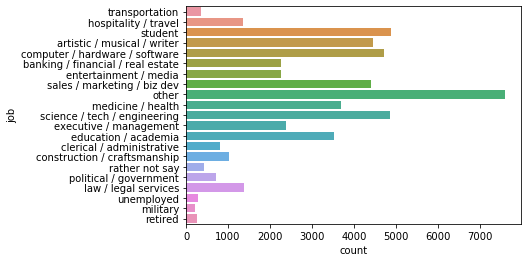

In [96]:
sns.countplot(data=df, y="job");

Smoking

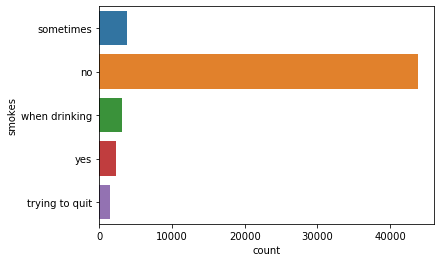

In [98]:
sns.countplot(data=df, y="smokes");

# Data Preparation

# Missing data

In [103]:
df.isnull().sum().reset_index()

,index,0
0,age,0
1,body_type,5296
2,diet,24395
3,drinks,2985
4,drugs,14080
5,education,6628
6,essay0,5488
7,essay1,7572
8,essay2,9638
9,essay3,11476


In [153]:
data = df.dropna()

In [154]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,sign,smokes,speaks,status,drinks_code,essay_len,smokes_code,body_code,or_code,sex_code
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,gemini,sometimes,english,single,2.0,2644,2.0,7.0,0,0
19,33,athletic,mostly anything,socially,never,graduated from masters program,i relocated to san francisco half a year ago. ...,"i left my comfort zone far behind in europe, a...","listening, connecting emotionally, analyzing t...","cheerful, open, curious, direct, active, sport...",...,pisces and it&rsquo;s fun to think about,no,english (fluently),single,2.0,2782,0.0,3.0,0,0
22,30,fit,mostly anything,socially,never,graduated from college/university,i tend to think the same way a comedian does a...,i'm a supply and demand manager for a sustaina...,"making predictions, planning anything (i'm pre...",that i'm smiling. pretty much at all times.,...,sagittarius but it doesn&rsquo;t matter,no,"english, spanish (poorly)",single,2.0,2082,0.0,2.0,0,0
94,29,fit,mostly anything,socially,sometimes,graduated from college/university,"my names josh, and i create art for a living. ...",living it,everything,i honestly couldn't say....,...,libra,no,english (fluently),single,2.0,1051,0.0,2.0,0,0
98,31,curvy,anything,socially,sometimes,graduated from masters program,one day i will mod r/hotchickswithspreadsheets...,"presently, holyshitwhatamidoinghere and the sp...","algebra, alliteration, big spoon and little sp...",i look a lot like that chick you banged your f...,...,pisces,no,english (fluently),single,2.0,887,0.0,6.0,0,1


In [155]:
cols = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'sex', 'orientation']

In [156]:
x_data = data[cols]

In [157]:
x_data = pd.get_dummies(x_data, columns=cols)
x_data.head()

,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,...,"ethnicity_pacific islander, other","ethnicity_pacific islander, white","ethnicity_pacific islander, white, other",ethnicity_white,"ethnicity_white, other",sex_f,sex_m,orientation_bisexual,orientation_gay,orientation_straight
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
19,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
22,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
94,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
98,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


Used to predict smoking

In [158]:
df.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

SPlit Data

In [160]:
y = data.smokes.values

In [128]:
from sklearn.model_selection import train_test_split

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y)

# Predictions

## Use Different Set of Algorithms to Predict Smoking

### Logistic Regression 

In [140]:
from sklearn.linear_model import LogisticRegression

In [164]:
clf = LogisticRegression()

In [165]:
clf.fit(x_train, y_train)

C:\Users\Jamiesadler\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jamiesadler\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
clf_predictions = clf.predict(x_test)

In [167]:
clf.score(x_test, y_test)

0.7985480943738656

In [168]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(y_test, clf_predictions))

                precision    recall  f1-score   support

            no       0.82      0.99      0.89       880
     sometimes       0.00      0.00      0.00        69
trying to quit       0.00      0.00      0.00        38
 when drinking       0.25      0.02      0.03        59
           yes       0.41      0.12      0.19        56

      accuracy                           0.80      1102
     macro avg       0.30      0.23      0.22      1102
  weighted avg       0.69      0.80      0.73      1102



Not bad, 80% accurate but only 23% accuracy when true positive. Weighted average very high but largely due to high inbalance of data and most people belonging to 'no smoking class'

### K-Nearest Nieighbour

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
n_classifier = KNeighborsClassifier(n_neighbors=5)

In [178]:
n_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [180]:
knn_predictions = n_classifier.predict(x_test)

In [182]:
print(classification_report(y_test, knn_predictions))

                precision    recall  f1-score   support

            no       0.81      0.99      0.89       880
     sometimes       0.07      0.01      0.02        69
trying to quit       0.00      0.00      0.00        38
 when drinking       0.17      0.02      0.03        59
           yes       0.33      0.04      0.06        56

      accuracy                           0.79      1102
     macro avg       0.28      0.21      0.20      1102
  weighted avg       0.67      0.79      0.72      1102



C:\Users\Jamiesadler\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Not quite as good as Logistic Regression

### Decision Trees

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
dt_classifier = RandomForestClassifier(n_estimators=100)

In [193]:
dt_model = dt_classifier.fit(x_train, y_train)

In [194]:
dt_predictions = dt_classifier.predict(x_test)

In [195]:
dt_classifier.score(x_test, y_test)

0.7831215970961888

In [196]:
print(classification_report(y_test, dt_predictions))

                precision    recall  f1-score   support

            no       0.81      0.97      0.88       880
     sometimes       0.06      0.01      0.02        69
trying to quit       0.33      0.03      0.05        38
 when drinking       0.20      0.03      0.06        59
           yes       0.20      0.05      0.08        56

      accuracy                           0.78      1102
     macro avg       0.32      0.22      0.22      1102
  weighted avg       0.68      0.78      0.72      1102



Still not quite as good as Logistic Regression

In [198]:
from sklearn.metrics import confusion_matrix 
dt_cm = confusion_matrix(y_test, dt_predictions)
dt_labels = dt_model.classes_

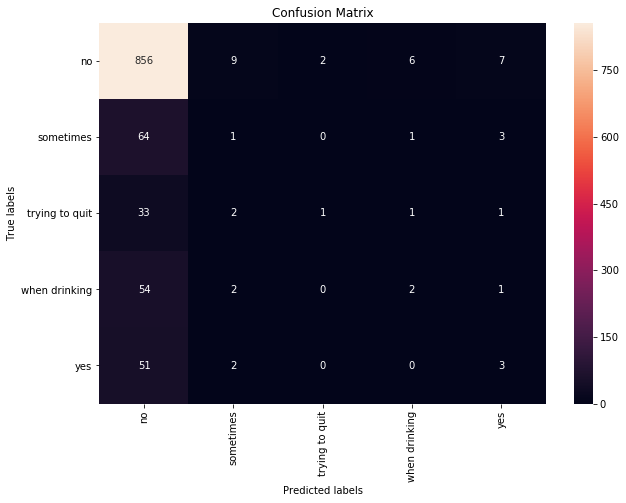

In [200]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(dt_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dt_labels); 
ax.yaxis.set_ticklabels(dt_labels);

Heat Map Shows Vast majority of predictions were no, which is were most of data was located. Visualises major inbalance of dataset in smoking category